In [3]:
import pandas as pd
import seaborn as sns
df = pd.read_csv("data/clean/transcripts_with_features_normalized.csv")
df.head()

,video_id,transcript,title,description,duration,view_count,like_count,channel_follower_count,categories,speech_duration,openai_response,ZCR,SpectralCentroid,SpectralFlux,RMSEnergy,doc_length,lexical_diversity
0,AAHiZ-c88ec,man getting frustrated water heater delivery s...,How to INSTALL a HEAT PUMP Electric WATER HEAT...,Need to catch some rats? Use our Twin Traps: h...,586,10280,161.0,375000.0,Education,492.817500,Good,0.147625,2020.684248,0.061404,0.060953,760,0.435526
1,AEsRr-ZnzNc,start give harry stack go war yes movie rock m...,MacFan Salutes E10 S3: Avatar the Way of water...,Shoutouts \n@RokuKun3 \n@HarryStrackTheGoAnima...,172,18,0.0,128.0,Entertainment,135.860625,Bad,0.090394,1459.411075,-0.286998,0.119854,142,0.676056
2,AJpzk-aFZPU,test number alright okay oh go ground oh god c...,Blow up an apple fail,Lets see if blowing up an apple is a great ides,108,44,4.0,31.0,People & Blogs,45.883125,Bad,0.232535,2547.312383,0.635120,0.091512,16,0.812500
3,AONXX-h9SdI,gonna play something brand new album came octo...,"Queensryche 2022-10-21 ""Behind The Walls"" Kala...","Queensryche performs the song ""Behind The Wall...",353,612,24.0,8450.0,Music,65.542500,Good,0.143601,2209.112949,0.005477,0.107071,266,0.289474
4,AOZIY-AwsjM,music,fish8,NaN,21,1,0.0,25.0,Comedy,2.345625,Bad,0.106159,1218.740176,-0.102051,0.036883,1,1.000000


In [15]:
df["speech_duration"] = df["speech_duration"].astype(int)
df["speech_ratio"] = df["speech_duration"] / df["duration"] # duration is int seconds was causing > 1 ratio

<Axes: >

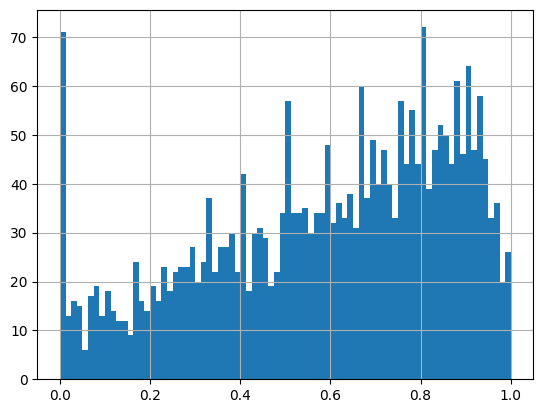

In [16]:
df["speech_ratio"].hist(bins=80)

In [17]:
df.columns

Index(['video_id', 'transcript', 'title', 'description', 'duration',
       'view_count', 'like_count', 'channel_follower_count', 'categories',
       'speech_duration', 'openai_response', 'ZCR', 'SpectralCentroid',
       'SpectralFlux', 'RMSEnergy', 'doc_length', 'lexical_diversity',
       'speech_ratio'],
      dtype='object')

In [39]:
df["view_count"].describe()

count    2.616000e+03
mean     1.027399e+04
std      2.411371e+05
min      0.000000e+00
25%      9.000000e+00
50%      3.600000e+01
75%      2.472500e+02
max      1.175512e+07
Name: view_count, dtype: float64

In [20]:
df["openai_response"].value_counts()

openai_response
Good    1462
Bad     1154
Name: count, dtype: int64

In [25]:
df.where((df["openai_response"] == "Good") & (df["speech_ratio"] > 0.5)).count()

video_id                  1139
transcript                1139
title                     1139
description                867
duration                  1139
view_count                1139
like_count                1139
channel_follower_count    1085
categories                1139
speech_duration           1139
openai_response           1139
ZCR                       1139
SpectralCentroid          1139
SpectralFlux              1139
RMSEnergy                 1139
doc_length                1139
lexical_diversity         1139
speech_ratio              1139
cluster                   1139
dtype: int64

In [32]:
df["categories"].value_counts()

categories
People & Blogs           1130
Gaming                    483
Entertainment             247
Education                 127
Music                     113
Comedy                     86
Sports                     76
Film & Animation           70
Autos & Vehicles           60
Howto & Style              59
News & Politics            39
Science & Technology       36
Travel & Events            33
Nonprofits & Activism      33
Pets & Animals             24
Name: count, dtype: int64